In [1]:
import netneurotools.datasets
import numpy as np
from msapy import msa, utils as ut, plottings as pl
import matplotlib.pyplot as plt

import seaborn as sns

from copy import deepcopy


from numba import njit

import warnings
warnings.simplefilter('ignore') 

from netneurotools.metrics import communicability_wei

SEED = 2022
pl.set_style(font_size=8)
my_colors = ['#006685', '#3FA5C4', '#FFFFFF', '#E84653', '#BF003F']
colormap = sns.blend_palette(my_colors,as_cmap=True)
rng = np.random.default_rng(seed=SEED)

In [2]:
@njit
def simple_dynamical_system(adjacency_matrix,input_matrix):

    X = np.zeros((input_matrix.shape[0], input_matrix.shape[1]))

    for timepoint in range(input_matrix.shape[1] - 1):
        X[:, timepoint + 1] = np.tanh(adjacency_matrix @ X[:, timepoint] + input_matrix[:,timepoint])

    return X

def normer(x):
    return (x - x.min()) / (x.max() - x.min())

def lesion_simple_nodes(complements, network, index, input):
    if len(complements) == len(network) - 1:
       return 0.0

    lesioned_network = deepcopy(network)
    for target in complements:
      lesioned_network[:,target] = 0.0
    dynamics = simple_dynamical_system(lesioned_network,input)

    lesioned_signal = dynamics[index,10:]
    return float(lesioned_signal.var())

In [3]:
data = {"human": {}, "rat": {}, "mouse": {}, "drosophila": {}}

In [4]:
data['human']['connectome'] = netneurotools.datasets.fetch_connectome('human_struct_scale033')
data['rat']['connectome'] = netneurotools.datasets.fetch_connectome('rat')
data['mouse']['connectome'] = netneurotools.datasets.fetch_connectome('mouse')
data['drosophila']['connectome'] = netneurotools.datasets.fetch_connectome('drosophila')

In [5]:
def get_connectivity(connectome):
    connectivity = normer(connectome['conn'])
    n_neurons = len(connectivity)
    communication_mask = np.where(communicability_wei(connectivity)!=0,1,0)

    return connectivity, communication_mask, n_neurons

def get_pulse_input(timesteps, n_neurons):
    input = np.zeros((n_neurons,timesteps))
    input[0,20:21] += 1

    return input

In [6]:
for species in data:

    data[species]['connectivity'], data[species]['communication_mask'], data[species]['n_neurons'] = get_connectivity(
        data[species]['connectome'])

    input = get_pulse_input(100, data[species]['n_neurons'])
    lesion_params = {'network': data[species]['connectivity'], 'input': input}

    data[species]['ci_mat'] = msa.estimate_causal_influences(elements=list(range(data[species]['n_neurons'])),
                                                             objective_function=lesion_simple_nodes,
                                                             objective_function_params=lesion_params,
                                                             n_permutations=1_000, n_cores=-1)


working on node number 0 from 83 nodes.


Playing the games:   0%|          | 16/78880 [00:00<1:02:47, 20.93it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(fl

working on node number 1 from 83 nodes.


Playing the games:   0%|          | 16/78864 [00:00<1:04:03, 20.52it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arra

working on node number 2 from 83 nodes.


Playing the games:   0%|          | 16/78914 [00:00<1:00:22, 21.78it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arra

working on node number 3 from 83 nodes.


Playing the games:   0%|          | 16/78861 [00:00<1:05:48, 19.97it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaP

working on node number 4 from 83 nodes.


Playing the games:   0%|          | 16/78867 [00:00<59:52, 21.95it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 5 from 83 nodes.


Playing the games:   0%|          | 16/78878 [00:00<1:04:29, 20.38it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arra

working on node number 6 from 83 nodes.


Playing the games:   0%|          | 16/78877 [00:00<1:01:21, 21.42it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(fl

working on node number 7 from 83 nodes.


Playing the games:   0%|          | 16/78855 [00:00<1:02:07, 21.15it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(fl

working on node number 8 from 83 nodes.


Playing the games:   0%|          | 16/78886 [00:00<1:01:34, 21.35it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arra

working on node number 9 from 83 nodes.


Playing the games:   0%|          | 16/78873 [00:00<1:06:11, 19.86it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pytho

working on node number 10 from 83 nodes.


Playing the games:   0%|          | 16/78857 [00:00<1:01:58, 21.20it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pytho

working on node number 11 from 83 nodes.


Playing the games:   0%|          | 16/78889 [00:00<1:01:18, 21.44it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arra

working on node number 12 from 83 nodes.


Playing the games:   0%|          | 16/78874 [00:00<1:03:32, 20.68it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pytho

working on node number 13 from 83 nodes.


Playing the games:   0%|          | 16/78855 [00:00<1:03:37, 20.65it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arra

working on node number 14 from 83 nodes.


Playing the games:   0%|          | 16/78873 [00:00<59:48, 21.97it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 15 from 83 nodes.


Playing the games:   0%|          | 16/78885 [00:00<1:05:50, 19.96it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(fl

working on node number 16 from 83 nodes.


Playing the games:   0%|          | 16/78877 [00:00<1:01:51, 21.25it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arra

working on node number 17 from 83 nodes.


Playing the games:   0%|          | 16/78867 [00:00<1:10:34, 18.62it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arra

working on node number 18 from 83 nodes.


Playing the games:   0%|          | 16/78859 [00:00<1:01:45, 21.28it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arra

working on node number 19 from 83 nodes.


Playing the games:   0%|          | 16/78902 [00:00<1:00:25, 21.76it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arra

working on node number 20 from 83 nodes.


Playing the games:   0%|          | 16/78900 [00:00<1:02:26, 21.05it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(fl

working on node number 21 from 83 nodes.


Playing the games:   0%|          | 16/78869 [00:00<1:07:03, 19.60it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pytho

working on node number 22 from 83 nodes.


Playing the games:   0%|          | 16/78890 [00:00<1:07:18, 19.53it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pytho

working on node number 23 from 83 nodes.


Playing the games:   0%|          | 16/78863 [00:00<1:00:51, 21.59it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pytho

working on node number 24 from 83 nodes.


Playing the games:   0%|          | 16/78866 [00:00<1:00:46, 21.62it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arra

working on node number 25 from 83 nodes.


Playing the games:   0%|          | 16/78885 [00:00<1:04:13, 20.47it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaP

working on node number 26 from 83 nodes.


Playing the games:   0%|          | 16/78882 [00:00<1:05:04, 20.20it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arra

working on node number 27 from 83 nodes.


Playing the games:   0%|          | 16/78882 [00:00<1:02:10, 21.14it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pytho

working on node number 28 from 83 nodes.


Playing the games:   0%|          | 16/78860 [00:00<59:34, 22.06it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 29 from 83 nodes.


Playing the games:   0%|          | 16/78863 [00:00<1:00:30, 21.72it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pytho

working on node number 30 from 83 nodes.


Playing the games:   0%|          | 16/78871 [00:00<1:02:04, 21.17it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(fl

working on node number 31 from 83 nodes.


Playing the games:   0%|          | 16/78900 [00:00<58:53, 22.32it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 32 from 83 nodes.


Playing the games:   0%|          | 16/78899 [00:00<1:05:56, 19.94it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(fl

working on node number 33 from 83 nodes.


Playing the games:   0%|          | 16/78862 [00:00<1:01:12, 21.47it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/pytho

working on node number 34 from 83 nodes.


Playing the games:   0%|          | 16/78891 [00:00<1:01:15, 21.46it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pytho

working on node number 35 from 83 nodes.


Playing the games:   0%|          | 16/78878 [00:00<59:09, 22.22it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 36 from 83 nodes.


Playing the games:   0%|          | 16/78886 [00:00<1:01:22, 21.42it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(fl

working on node number 37 from 83 nodes.


Playing the games:   0%|          | 16/78890 [00:00<59:31, 22.09it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 38 from 83 nodes.


Playing the games:   0%|          | 16/78884 [00:00<59:50, 21.97it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 39 from 83 nodes.


Playing the games:   0%|          | 16/78883 [00:00<1:03:54, 20.57it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(fl

working on node number 40 from 83 nodes.


Playing the games:   0%|          | 16/78872 [00:00<1:02:14, 21.12it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous

working on node number 41 from 83 nodes.


Playing the games:   0%|          | 16/78891 [00:00<1:00:00, 21.91it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaP

working on node number 42 from 83 nodes.


Playing the games:   0%|          | 16/78903 [00:00<59:21, 22.15it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPer

working on node number 43 from 83 nodes.


Playing the games:   0%|          | 16/78884 [00:00<59:18, 22.16it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 44 from 83 nodes.


Playing the games:   0%|          | 16/78898 [00:00<58:35, 22.44it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 45 from 83 nodes.


Playing the games:   0%|          | 16/78894 [00:00<58:43, 22.39it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 46 from 83 nodes.


Playing the games:   0%|          | 16/78855 [00:00<58:08, 22.60it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 47 from 83 nodes.


Playing the games:   0%|          | 16/78875 [00:00<59:34, 22.06it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPer

working on node number 48 from 83 nodes.


Playing the games:   0%|          | 16/78885 [00:00<59:27, 22.11it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 49 from 83 nodes.


Playing the games:   0%|          | 16/78867 [00:00<1:00:55, 21.57it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/pytho

working on node number 50 from 83 nodes.


Playing the games:   0%|          | 16/78886 [00:00<1:01:04, 21.52it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaP

working on node number 51 from 83 nodes.


Playing the games:   0%|          | 16/78890 [00:00<59:31, 22.08it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 52 from 83 nodes.


Playing the games:   0%|          | 16/78901 [00:00<1:04:05, 20.51it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pytho

working on node number 53 from 83 nodes.


Playing the games:   0%|          | 16/78881 [00:00<59:45, 22.00it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 54 from 83 nodes.


Playing the games:   0%|          | 16/78882 [00:00<58:03, 22.64it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 55 from 83 nodes.


Playing the games:   0%|          | 16/78887 [00:00<1:05:15, 20.15it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaP

working on node number 56 from 83 nodes.


Playing the games:   0%|          | 16/78874 [00:00<1:00:37, 21.68it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(fl

working on node number 57 from 83 nodes.


Playing the games:   0%|          | 16/78884 [00:00<1:01:20, 21.43it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pytho

working on node number 58 from 83 nodes.


Playing the games:   0%|          | 16/78890 [00:00<1:01:54, 21.23it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(fl

working on node number 59 from 83 nodes.


Playing the games:   0%|          | 16/78888 [00:00<59:35, 22.06it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 60 from 83 nodes.


Playing the games:   0%|          | 16/78910 [00:00<1:05:04, 20.21it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(fl

working on node number 61 from 83 nodes.


Playing the games:   0%|          | 16/78876 [00:00<1:03:28, 20.70it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(fl

working on node number 62 from 83 nodes.


Playing the games:   0%|          | 16/78870 [00:00<59:06, 22.24it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 63 from 83 nodes.


Playing the games:   0%|          | 16/78850 [00:00<1:00:08, 21.85it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(fl

working on node number 64 from 83 nodes.


Playing the games:   0%|          | 16/78872 [00:00<1:00:45, 21.63it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(fl

working on node number 65 from 83 nodes.


Playing the games:   0%|          | 16/78886 [00:00<59:38, 22.04it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 66 from 83 nodes.


Playing the games:   0%|          | 16/78881 [00:00<1:02:04, 21.18it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pytho

working on node number 67 from 83 nodes.


Playing the games:   0%|          | 16/78883 [00:00<1:03:27, 20.71it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arra

working on node number 68 from 83 nodes.


Playing the games:   0%|          | 16/78910 [00:00<1:04:29, 20.39it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(fl

working on node number 69 from 83 nodes.


Playing the games:   0%|          | 16/78871 [00:00<1:04:23, 20.41it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(fl

working on node number 70 from 83 nodes.


Playing the games:   0%|          | 16/78887 [00:00<1:01:03, 21.53it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arra

working on node number 71 from 83 nodes.


Playing the games:   0%|          | 16/78908 [00:00<1:06:09, 19.87it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaP

working on node number 72 from 83 nodes.


Playing the games:   0%|          | 16/78886 [00:00<1:05:52, 19.95it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pytho

working on node number 73 from 83 nodes.


Playing the games:   0%|          | 16/78894 [00:00<58:02, 22.65it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 74 from 83 nodes.


Playing the games:   0%|          | 16/78900 [00:00<59:57, 21.93it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPer

working on node number 75 from 83 nodes.


Playing the games:   0%|          | 16/78888 [00:00<1:03:32, 20.69it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arra

working on node number 76 from 83 nodes.


Playing the games:   0%|          | 16/78874 [00:00<59:02, 22.26it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 77 from 83 nodes.


Playing the games:   0%|          | 16/78895 [00:00<1:00:11, 21.84it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(fl

working on node number 78 from 83 nodes.


Playing the games:   0%|          | 16/78888 [00:00<1:01:08, 21.50it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(fl

working on node number 79 from 83 nodes.


Playing the games:   0%|          | 16/78889 [00:00<58:23, 22.51it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 80 from 83 nodes.


Playing the games:   0%|          | 16/78902 [00:00<59:50, 21.97it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 81 from 83 nodes.


Playing the games:   0%|          | 16/78873 [00:00<59:36, 22.05it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 82 from 83 nodes.


Playing the games:   0%|          | 16/78875 [00:00<1:00:12, 21.83it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pytho

working on node number 0 from 73 nodes.


Playing the games:   0%|          | 16/68767 [00:00<54:47, 20.91it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 1 from 73 nodes.


Playing the games:   0%|          | 16/68744 [00:00<54:46, 20.91it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 2 from 73 nodes.


Playing the games:   0%|          | 16/68785 [00:00<59:47, 19.17it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 3 from 73 nodes.


Playing the games:   0%|          | 16/68774 [00:00<54:22, 21.08it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 4 from 73 nodes.


Playing the games:   0%|          | 16/68781 [00:00<53:51, 21.28it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 5 from 73 nodes.


Playing the games:   0%|          | 16/68792 [00:00<53:20, 21.49it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 6 from 73 nodes.


Playing the games:   0%|          | 16/68786 [00:00<51:47, 22.13it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 7 from 73 nodes.


Playing the games:   0%|          | 16/68790 [00:00<54:24, 21.07it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 8 from 73 nodes.


Playing the games:   0%|          | 16/68774 [00:00<52:18, 21.91it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 9 from 73 nodes.


Playing the games:   0%|          | 16/68788 [00:00<53:50, 21.29it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPer

working on node number 10 from 73 nodes.


Playing the games:   0%|          | 16/68812 [00:00<50:19, 22.78it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 11 from 73 nodes.


Playing the games:   0%|          | 16/68791 [00:00<55:37, 20.61it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 12 from 73 nodes.


Playing the games:   0%|          | 16/68780 [00:00<56:42, 20.21it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 13 from 73 nodes.


Playing the games:   0%|          | 16/68788 [00:00<56:05, 20.44it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 14 from 73 nodes.


Playing the games:   0%|          | 16/68786 [00:00<52:33, 21.81it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 15 from 73 nodes.


Playing the games:   0%|          | 16/68780 [00:00<50:23, 22.74it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 16 from 73 nodes.


Playing the games:   0%|          | 16/68802 [00:00<51:25, 22.29it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 17 from 73 nodes.


Playing the games:   0%|          | 16/68811 [00:00<58:48, 19.50it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 18 from 73 nodes.


Playing the games:   0%|          | 16/68798 [00:00<49:36, 23.10it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 19 from 73 nodes.


Playing the games:   0%|          | 16/68776 [00:00<50:50, 22.54it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 20 from 73 nodes.


Playing the games:   0%|          | 16/68748 [00:00<54:11, 21.14it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 21 from 73 nodes.


Playing the games:   0%|          | 16/68783 [00:00<54:39, 20.97it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 22 from 73 nodes.


Playing the games:   0%|          | 16/68735 [00:00<51:54, 22.07it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 23 from 73 nodes.


Playing the games:   0%|          | 16/68789 [00:00<53:00, 21.63it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 24 from 73 nodes.


Playing the games:   0%|          | 16/68767 [00:00<55:03, 20.81it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 25 from 73 nodes.


Playing the games:   0%|          | 16/68797 [00:00<53:33, 21.41it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 26 from 73 nodes.


Playing the games:   0%|          | 16/68776 [00:00<51:51, 22.10it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 27 from 73 nodes.


Playing the games:   0%|          | 16/68795 [00:00<54:25, 21.06it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 28 from 73 nodes.


Playing the games:   0%|          | 16/68792 [00:00<52:54, 21.67it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 29 from 73 nodes.


Playing the games:   0%|          | 16/68766 [00:00<51:03, 22.44it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 30 from 73 nodes.


Playing the games:   0%|          | 16/68774 [00:00<56:07, 20.42it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 31 from 73 nodes.


Playing the games:   0%|          | 16/68786 [00:00<54:01, 21.22it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 32 from 73 nodes.


Playing the games:   0%|          | 16/68793 [00:00<52:46, 21.72it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 33 from 73 nodes.


Playing the games:   0%|          | 16/68755 [00:00<52:15, 21.92it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 34 from 73 nodes.


Playing the games:   0%|          | 16/68791 [00:00<53:47, 21.31it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 35 from 73 nodes.


Playing the games:   0%|          | 16/68782 [00:00<52:33, 21.81it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 36 from 73 nodes.


Playing the games:   0%|          | 16/68780 [00:00<55:40, 20.58it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 37 from 73 nodes.


Playing the games:   0%|          | 16/68751 [00:00<54:06, 21.17it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 38 from 73 nodes.


Playing the games:   0%|          | 16/68800 [00:00<53:04, 21.60it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 39 from 73 nodes.


Playing the games:   0%|          | 16/68767 [00:00<52:39, 21.76it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 40 from 73 nodes.


Playing the games:   0%|          | 16/68786 [00:00<51:53, 22.09it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 41 from 73 nodes.


Playing the games:   0%|          | 16/68779 [00:00<52:45, 21.72it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 42 from 73 nodes.


Playing the games:   0%|          | 16/68767 [00:00<51:22, 22.30it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 43 from 73 nodes.


Playing the games:   0%|          | 16/68768 [00:00<51:57, 22.05it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 44 from 73 nodes.


Playing the games:   0%|          | 16/68810 [00:00<52:03, 22.02it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 45 from 73 nodes.


Playing the games:   0%|          | 16/68793 [00:00<51:34, 22.22it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 46 from 73 nodes.


Playing the games:   0%|          | 16/68780 [00:00<53:58, 21.23it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 47 from 73 nodes.


Playing the games:   0%|          | 16/68803 [00:00<52:18, 21.92it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 48 from 73 nodes.


Playing the games:   0%|          | 16/68805 [00:00<53:02, 21.62it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 49 from 73 nodes.


Playing the games:   0%|          | 16/68779 [00:00<51:53, 22.09it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 50 from 73 nodes.


Playing the games:   0%|          | 16/68772 [00:00<53:01, 21.61it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 51 from 73 nodes.


Playing the games:   0%|          | 16/68766 [00:00<51:32, 22.23it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 52 from 73 nodes.


Playing the games:   0%|          | 16/68781 [00:00<53:00, 21.62it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 53 from 73 nodes.


Playing the games:   0%|          | 16/68791 [00:00<51:34, 22.22it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPer

working on node number 54 from 73 nodes.


Playing the games:   0%|          | 16/68774 [00:00<54:07, 21.17it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 55 from 73 nodes.


Playing the games:   0%|          | 16/68782 [00:00<51:39, 22.19it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 56 from 73 nodes.


Playing the games:   0%|          | 16/68800 [00:00<51:27, 22.28it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 57 from 73 nodes.


Playing the games:   0%|          | 16/68779 [00:00<52:35, 21.79it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 58 from 73 nodes.


Playing the games:   0%|          | 16/68790 [00:00<53:36, 21.38it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 59 from 73 nodes.


Playing the games:   0%|          | 16/68795 [00:00<52:39, 21.77it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 60 from 73 nodes.


Playing the games:   0%|          | 16/68772 [00:00<52:00, 22.04it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 61 from 73 nodes.


Playing the games:   0%|          | 16/68789 [00:00<51:16, 22.35it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 62 from 73 nodes.


Playing the games:   0%|          | 16/68789 [00:00<51:24, 22.29it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 63 from 73 nodes.


Playing the games:   0%|          | 16/68806 [00:00<51:51, 22.11it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 64 from 73 nodes.


Playing the games:   0%|          | 16/68780 [00:00<51:40, 22.18it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 65 from 73 nodes.


Playing the games:   0%|          | 16/68759 [00:00<52:30, 21.82it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 66 from 73 nodes.


Playing the games:   0%|          | 16/68776 [00:00<51:45, 22.14it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 67 from 73 nodes.


Playing the games:   0%|          | 16/68819 [00:00<53:51, 21.29it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 68 from 73 nodes.


Playing the games:   0%|          | 16/68795 [00:00<51:52, 22.10it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 69 from 73 nodes.


Playing the games:   0%|          | 16/68789 [00:00<50:48, 22.56it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 70 from 73 nodes.


Playing the games:   0%|          | 16/68760 [00:00<53:04, 21.59it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 71 from 73 nodes.


Playing the games:   0%|          | 16/68805 [00:00<51:31, 22.25it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 72 from 73 nodes.


Playing the games:   0%|          | 16/68777 [00:00<51:48, 22.12it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 0 from 112 nodes.


Playing the games:   0%|          | 16/108055 [00:00<1:20:16, 22.43it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 1 from 112 nodes.


Playing the games:   0%|          | 16/108059 [00:00<1:25:13, 21.13it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 2 from 112 nodes.


Playing the games:   0%|          | 16/108066 [00:00<1:22:10, 21.91it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 3 from 112 nodes.


Playing the games:   0%|          | 16/108050 [00:00<1:20:25, 22.39it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 4 from 112 nodes.


Playing the games:   0%|          | 16/108069 [00:00<1:27:09, 20.66it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pyth

working on node number 5 from 112 nodes.


Playing the games:   0%|          | 16/108065 [00:00<1:20:31, 22.36it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 6 from 112 nodes.


Playing the games:   0%|          | 16/108051 [00:00<1:19:30, 22.64it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pyth

working on node number 7 from 112 nodes.


Playing the games:   0%|          | 16/108062 [00:00<1:28:30, 20.35it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 8 from 112 nodes.


Playing the games:   0%|          | 16/108067 [00:00<1:20:02, 22.50it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 9 from 112 nodes.


Playing the games:   0%|          | 16/108067 [00:00<1:25:29, 21.06it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 10 from 112 nodes.


Playing the games:   0%|          | 16/108051 [00:00<1:23:12, 21.64it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 11 from 112 nodes.


Playing the games:   0%|          | 16/108077 [00:00<1:22:14, 21.90it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pyth

working on node number 12 from 112 nodes.


Playing the games:   0%|          | 16/108070 [00:00<1:24:57, 21.20it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 13 from 112 nodes.


Playing the games:   0%|          | 16/108078 [00:00<1:19:38, 22.62it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 14 from 112 nodes.


Playing the games:   0%|          | 16/108062 [00:00<1:26:33, 20.80it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 15 from 112 nodes.


Playing the games:   0%|          | 16/108088 [00:00<1:24:09, 21.40it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 16 from 112 nodes.


Playing the games:   0%|          | 16/108065 [00:00<1:21:16, 22.16it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 17 from 112 nodes.


Playing the games:   0%|          | 16/108056 [00:00<1:24:52, 21.21it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pyth

working on node number 18 from 112 nodes.


Playing the games:   0%|          | 16/108077 [00:00<1:21:38, 22.06it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 19 from 112 nodes.


Playing the games:   0%|          | 16/108073 [00:00<1:19:34, 22.63it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pyth

working on node number 20 from 112 nodes.


Playing the games:   0%|          | 16/108064 [00:00<1:23:13, 21.64it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 21 from 112 nodes.


Playing the games:   0%|          | 16/108071 [00:00<1:27:21, 20.61it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 22 from 112 nodes.


Playing the games:   0%|          | 16/108085 [00:00<1:22:29, 21.83it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 23 from 112 nodes.


Playing the games:   0%|          | 16/108054 [00:00<1:18:35, 22.91it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pyth

working on node number 24 from 112 nodes.


Playing the games:   0%|          | 16/108060 [00:00<1:17:56, 23.10it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 25 from 112 nodes.


Playing the games:   0%|          | 16/108074 [00:00<1:19:22, 22.69it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 26 from 112 nodes.


Playing the games:   0%|          | 16/108069 [00:00<1:29:02, 20.23it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 27 from 112 nodes.


Playing the games:   0%|          | 16/108076 [00:00<1:24:51, 21.22it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pyth

working on node number 28 from 112 nodes.


Playing the games:   0%|          | 16/108049 [00:00<1:18:31, 22.93it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 29 from 112 nodes.


Playing the games:   0%|          | 16/108056 [00:00<1:22:10, 21.91it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 30 from 112 nodes.


Playing the games:   0%|          | 16/108051 [00:00<1:22:17, 21.88it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 31 from 112 nodes.


Playing the games:   0%|          | 16/108067 [00:00<1:25:10, 21.14it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 32 from 112 nodes.


Playing the games:   0%|          | 16/108038 [00:00<1:20:29, 22.37it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 33 from 112 nodes.


Playing the games:   0%|          | 16/108058 [00:00<1:23:52, 21.47it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 34 from 112 nodes.


Playing the games:   0%|          | 16/108060 [00:00<1:23:41, 21.52it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 35 from 112 nodes.


Playing the games:   0%|          | 16/108082 [00:00<1:23:37, 21.54it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pyth

working on node number 36 from 112 nodes.


Playing the games:   0%|          | 16/108059 [00:00<1:16:28, 23.55it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 37 from 112 nodes.


Playing the games:   0%|          | 16/108074 [00:00<1:24:02, 21.43it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 38 from 112 nodes.


Playing the games:   0%|          | 16/108063 [00:00<1:22:52, 21.73it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 39 from 112 nodes.


Playing the games:   0%|          | 16/108064 [00:00<1:19:03, 22.78it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 40 from 112 nodes.


Playing the games:   0%|          | 16/108049 [00:00<1:23:33, 21.55it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 41 from 112 nodes.


Playing the games:   0%|          | 16/108082 [00:00<1:21:23, 22.13it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pyth

working on node number 42 from 112 nodes.


Playing the games:   0%|          | 16/108063 [00:00<1:29:20, 20.16it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 43 from 112 nodes.


Playing the games:   0%|          | 16/108050 [00:00<1:19:16, 22.71it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 44 from 112 nodes.


Playing the games:   0%|          | 16/108062 [00:00<1:28:39, 20.31it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguou

working on node number 45 from 112 nodes.


Playing the games:   0%|          | 16/108049 [00:00<1:24:41, 21.26it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 46 from 112 nodes.


Playing the games:   0%|          | 16/108064 [00:00<1:25:22, 21.09it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 47 from 112 nodes.


Playing the games:   0%|          | 16/108051 [00:00<1:20:47, 22.29it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 48 from 112 nodes.


Playing the games:   0%|          | 16/108075 [00:00<1:22:37, 21.80it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 49 from 112 nodes.


Playing the games:   0%|          | 16/108090 [00:00<1:22:36, 21.80it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 50 from 112 nodes.


Playing the games:   0%|          | 16/108080 [00:00<1:25:27, 21.08it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/pyth

working on node number 51 from 112 nodes.


Playing the games:   0%|          | 16/108076 [00:00<1:30:45, 19.84it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 52 from 112 nodes.


Playing the games:   0%|          | 16/108061 [00:00<1:27:37, 20.55it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 53 from 112 nodes.


Playing the games:   0%|          | 16/108065 [00:00<1:21:51, 22.00it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 54 from 112 nodes.


Playing the games:   0%|          | 16/108083 [00:00<1:23:02, 21.69it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/pyth

working on node number 55 from 112 nodes.


Playing the games:   0%|          | 16/108069 [00:00<1:23:09, 21.66it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 56 from 112 nodes.


Playing the games:   0%|          | 16/108078 [00:00<1:27:23, 20.61it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 57 from 112 nodes.


Playing the games:   0%|          | 16/108062 [00:00<1:21:23, 22.12it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 58 from 112 nodes.


Playing the games:   0%|          | 16/108061 [00:00<1:36:41, 18.62it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pyth

working on node number 59 from 112 nodes.


Playing the games:   0%|          | 16/108061 [00:00<1:26:06, 20.91it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 60 from 112 nodes.


Playing the games:   0%|          | 16/108065 [00:00<1:19:35, 22.63it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 61 from 112 nodes.


Playing the games:   0%|          | 16/108060 [00:00<1:22:25, 21.85it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 62 from 112 nodes.


Playing the games:   0%|          | 16/108058 [00:00<1:19:24, 22.67it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 63 from 112 nodes.


Playing the games:   0%|          | 16/108063 [00:00<1:25:00, 21.18it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 64 from 112 nodes.


Playing the games:   0%|          | 16/108054 [00:00<1:20:43, 22.30it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 65 from 112 nodes.


Playing the games:   0%|          | 16/108070 [00:00<1:25:43, 21.01it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 66 from 112 nodes.


Playing the games:   0%|          | 16/108044 [00:00<1:19:12, 22.73it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pyth

working on node number 67 from 112 nodes.


Playing the games:   0%|          | 16/108060 [00:00<1:22:37, 21.79it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 68 from 112 nodes.


Playing the games:   0%|          | 16/108046 [00:00<1:31:17, 19.72it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 69 from 112 nodes.


Playing the games:   0%|          | 16/108048 [00:00<1:22:36, 21.80it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 70 from 112 nodes.


Playing the games:   0%|          | 16/108063 [00:00<1:21:48, 22.01it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 71 from 112 nodes.


Playing the games:   0%|          | 16/108087 [00:00<1:22:28, 21.84it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pyth

working on node number 72 from 112 nodes.


Playing the games:   0%|          | 16/108068 [00:00<1:21:42, 22.04it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 73 from 112 nodes.


Playing the games:   0%|          | 16/108083 [00:00<1:23:55, 21.46it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pyth

working on node number 74 from 112 nodes.


Playing the games:   0%|          | 16/108073 [00:00<1:20:14, 22.45it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 75 from 112 nodes.


Playing the games:   0%|          | 16/108067 [00:00<1:25:09, 21.15it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pyth

working on node number 76 from 112 nodes.


Playing the games:   0%|          | 16/108068 [00:00<1:19:42, 22.59it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 77 from 112 nodes.


Playing the games:   0%|          | 16/108075 [00:00<1:21:21, 22.14it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 78 from 112 nodes.


Playing the games:   0%|          | 16/108057 [00:00<1:20:07, 22.47it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 79 from 112 nodes.


Playing the games:   0%|          | 16/108079 [00:00<1:24:41, 21.26it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pyth

working on node number 80 from 112 nodes.


Playing the games:   0%|          | 16/108043 [00:00<1:23:51, 21.47it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 81 from 112 nodes.


Playing the games:   0%|          | 16/108052 [00:00<1:29:55, 20.02it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 82 from 112 nodes.


Playing the games:   0%|          | 16/108061 [00:00<1:30:30, 19.90it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/pyth

working on node number 83 from 112 nodes.


Playing the games:   0%|          | 16/108069 [00:00<1:20:41, 22.32it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 84 from 112 nodes.


Playing the games:   0%|          | 16/108067 [00:00<1:23:28, 21.58it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 85 from 112 nodes.


Playing the games:   0%|          | 16/108068 [00:00<1:19:01, 22.79it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 86 from 112 nodes.


Playing the games:   0%|          | 16/108086 [00:00<1:22:01, 21.96it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 87 from 112 nodes.


Playing the games:   0%|          | 16/108056 [00:00<1:20:54, 22.26it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 88 from 112 nodes.


Playing the games:   0%|          | 16/108066 [00:00<1:19:25, 22.67it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 89 from 112 nodes.


Playing the games:   0%|          | 16/108080 [00:00<1:25:03, 21.17it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 90 from 112 nodes.


Playing the games:   0%|          | 16/108069 [00:00<1:27:49, 20.50it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 91 from 112 nodes.


Playing the games:   0%|          | 16/108073 [00:00<1:46:02, 16.98it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pyth

working on node number 92 from 112 nodes.


Playing the games:   0%|          | 16/108074 [00:00<1:24:59, 21.19it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 93 from 112 nodes.


Playing the games:   0%|          | 16/108065 [00:00<1:21:37, 22.06it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 94 from 112 nodes.


Playing the games:   0%|          | 16/108072 [00:00<1:18:15, 23.01it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 95 from 112 nodes.


Playing the games:   0%|          | 16/108054 [00:00<1:26:37, 20.79it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 96 from 112 nodes.


Playing the games:   0%|          | 16/108062 [00:00<1:28:32, 20.34it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/pyth

working on node number 97 from 112 nodes.


Playing the games:   0%|          | 16/108078 [00:00<1:30:45, 19.85it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 98 from 112 nodes.


Playing the games:   0%|          | 16/108059 [00:00<1:21:01, 22.22it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 99 from 112 nodes.


Playing the games:   0%|          | 16/108050 [00:00<1:19:15, 22.72it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 100 from 112 nodes.


Playing the games:   0%|          | 16/108057 [00:00<1:24:56, 21.20it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 101 from 112 nodes.


Playing the games:   0%|          | 16/108063 [00:00<1:24:55, 21.20it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 102 from 112 nodes.


Playing the games:   0%|          | 16/108068 [00:00<1:24:50, 21.22it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: Numba

working on node number 103 from 112 nodes.


Playing the games:   0%|          | 16/108056 [00:00<1:18:21, 22.98it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 104 from 112 nodes.


Playing the games:   0%|          | 16/108066 [00:00<1:28:06, 20.44it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 105 from 112 nodes.


Playing the games:   0%|          | 16/108067 [00:00<1:23:19, 21.61it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 106 from 112 nodes.


Playing the games:   0%|          | 16/108073 [00:00<1:25:25, 21.08it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 107 from 112 nodes.


Playing the games:   0%|          | 16/108056 [00:00<1:29:26, 20.13it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arr

working on node number 108 from 112 nodes.


Playing the games:   0%|          | 16/108052 [00:00<1:42:56, 17.49it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 109 from 112 nodes.


Playing the games:   0%|          | 16/108048 [00:00<1:36:23, 18.68it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/pyth

working on node number 110 from 112 nodes.


Playing the games:   0%|          | 16/108068 [00:00<1:33:33, 19.25it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 111 from 112 nodes.


Playing the games:   0%|          | 16/108058 [00:00<1:44:49, 17.18it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(f

working on node number 0 from 49 nodes.


Playing the games:   0%|          | 16/44367 [00:00<33:33, 22.03it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 1 from 49 nodes.


Playing the games:   0%|          | 16/44348 [00:00<35:29, 20.82it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 2 from 49 nodes.


Playing the games:   0%|          | 16/44360 [00:00<33:29, 22.07it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 3 from 49 nodes.


Playing the games:   0%|          | 16/44347 [00:00<37:12, 19.86it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 4 from 49 nodes.


Playing the games:   0%|          | 16/44368 [00:00<34:08, 21.65it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 5 from 49 nodes.


Playing the games:   0%|          | 16/44344 [00:00<32:24, 22.80it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 6 from 49 nodes.


Playing the games:   0%|          | 16/44352 [00:00<32:39, 22.63it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 7 from 49 nodes.


Playing the games:   0%|          | 16/44325 [00:00<37:01, 19.94it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 8 from 49 nodes.


Playing the games:   0%|          | 16/44341 [00:00<34:15, 21.56it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 9 from 49 nodes.


Playing the games:   0%|          | 16/44354 [00:00<35:39, 20.72it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 10 from 49 nodes.


Playing the games:   0%|          | 16/44349 [00:00<33:56, 21.77it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 11 from 49 nodes.


Playing the games:   0%|          | 16/44365 [00:00<33:05, 22.34it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 12 from 49 nodes.


Playing the games:   0%|          | 16/44372 [00:00<37:33, 19.69it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPer

working on node number 13 from 49 nodes.


Playing the games:   0%|          | 16/44376 [00:00<38:03, 19.42it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 14 from 49 nodes.


Playing the games:   0%|          | 16/44343 [00:00<34:06, 21.66it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 15 from 49 nodes.


Playing the games:   0%|          | 16/44395 [00:00<37:48, 19.56it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 16 from 49 nodes.


Playing the games:   0%|          | 16/44375 [00:00<38:00, 19.45it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 17 from 49 nodes.


Playing the games:   0%|          | 16/44361 [00:00<31:53, 23.17it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 18 from 49 nodes.


Playing the games:   0%|          | 16/44343 [00:00<35:21, 20.90it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 19 from 49 nodes.


Playing the games:   0%|          | 16/44361 [00:00<36:59, 19.98it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 20 from 49 nodes.


Playing the games:   0%|          | 16/44370 [00:00<36:51, 20.06it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 21 from 49 nodes.


Playing the games:   0%|          | 16/44369 [00:00<34:34, 21.38it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 22 from 49 nodes.


Playing the games:   0%|          | 16/44372 [00:00<33:47, 21.88it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 23 from 49 nodes.


Playing the games:   0%|          | 16/44355 [00:00<32:33, 22.70it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 24 from 49 nodes.


Playing the games:   0%|          | 16/44368 [00:00<35:54, 20.59it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 25 from 49 nodes.


Playing the games:   0%|          | 16/44362 [00:00<36:54, 20.03it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 26 from 49 nodes.


Playing the games:   0%|          | 16/44363 [00:00<35:14, 20.98it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 27 from 49 nodes.


Playing the games:   0%|          | 16/44378 [00:00<37:44, 19.59it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 28 from 49 nodes.


Playing the games:   0%|          | 16/44394 [00:00<35:26, 20.87it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 29 from 49 nodes.


Playing the games:   0%|          | 16/44386 [00:00<36:55, 20.03it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 30 from 49 nodes.


Playing the games:   0%|          | 16/44380 [00:00<35:04, 21.09it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 31 from 49 nodes.


Playing the games:   0%|          | 16/44354 [00:00<36:58, 19.99it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 32 from 49 nodes.


Playing the games:   0%|          | 16/44389 [00:00<40:49, 18.11it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 33 from 49 nodes.


Playing the games:   0%|          | 16/44355 [00:00<35:26, 20.86it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 34 from 49 nodes.


Playing the games:   0%|          | 16/44353 [00:01<51:22, 14.38it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 35 from 49 nodes.


Playing the games:   0%|          | 16/44376 [00:00<36:22, 20.33it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 36 from 49 nodes.


Playing the games:   0%|          | 16/44327 [00:00<36:53, 20.02it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 37 from 49 nodes.


Playing the games:   0%|          | 16/44358 [00:00<37:46, 19.56it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 38 from 49 nodes.


Playing the games:   0%|          | 16/44400 [00:00<34:56, 21.17it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 39 from 49 nodes.


Playing the games:   0%|          | 16/44381 [00:00<43:47, 16.88it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 40 from 49 nodes.


Playing the games:   0%|          | 16/44383 [00:00<38:47, 19.06it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 41 from 49 nodes.


Playing the games:   0%|          | 16/44365 [00:01<56:55, 12.98it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPer

working on node number 42 from 49 nodes.


Playing the games:   0%|          | 16/44367 [00:00<39:46, 18.58it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPer

working on node number 43 from 49 nodes.


Playing the games:   0%|          | 16/44362 [00:00<35:31, 20.81it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 44 from 49 nodes.


Playing the games:   0%|          | 16/44353 [00:00<34:23, 21.49it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3

working on node number 45 from 49 nodes.


Playing the games:   0%|          | 16/44346 [00:00<33:13, 22.23it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 46 from 49 nodes.


Playing the games:   0%|          | 16/44371 [00:00<32:11, 22.96it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

working on node number 47 from 49 nodes.


Playing the games:   0%|          | 16/44347 [00:00<38:10, 19.35it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(floa

working on node number 48 from 49 nodes.


Playing the games:   0%|          | 16/44399 [00:00<33:50, 21.85it/s]/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/hiwi/anaconda3/envs/com-caus/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
/tmp/ipykernel_19874/1083401764.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays

In [31]:
for species in data:
    data[species]['ci_mat_norm'] = normer(data[species]['ci_mat'] * data[species]['communication_mask'])
    data[species]['communicability'] = communicability_wei(data[species]['connectivity'])
    data[species]['communicability_norm'] = normer(data[species]['communicability'])
    data[species]['difference'] = data[species]['ci_mat_norm'] - data[species]['communicability_norm']

In [11]:
with open("data.pickle", "wb") as f:
    import pickle
    pickle.dump(data, f)

In [27]:
with open("data.pickle", "rb") as f:
    import pickle
    data = pickle.load(f)

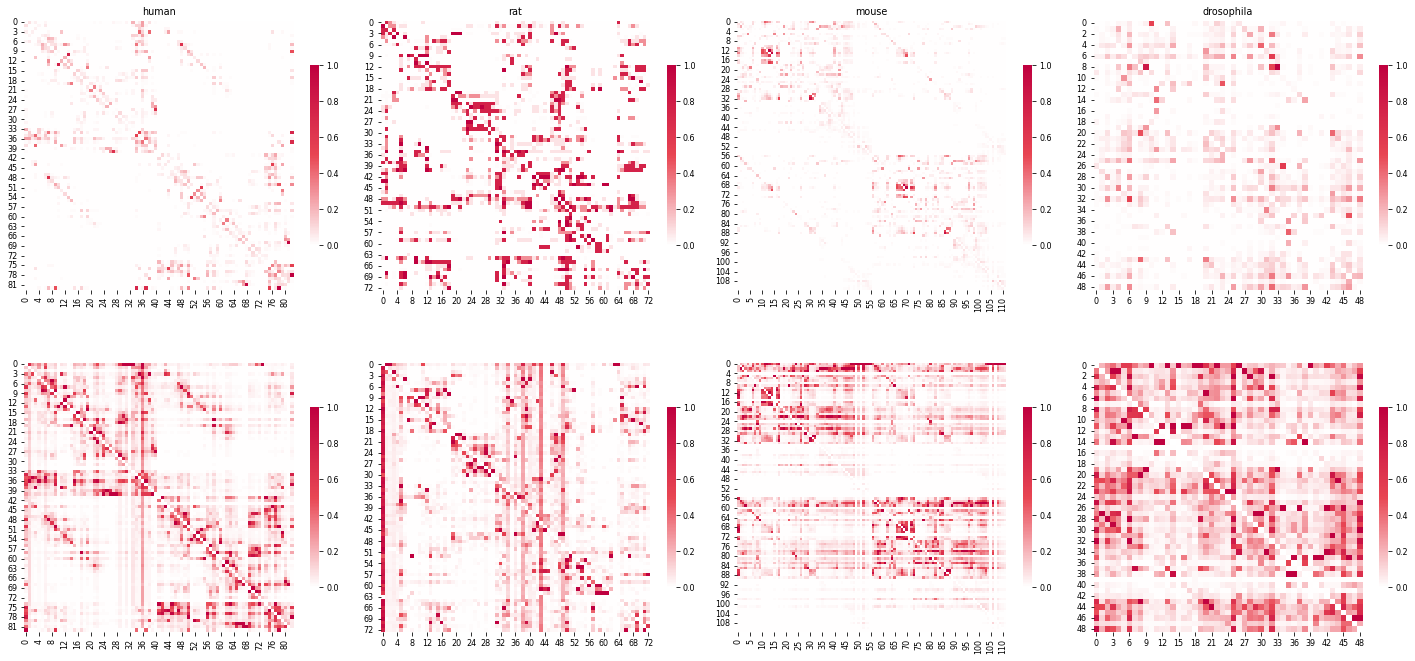

In [30]:
cols = list(data.keys())
rows = ["Connectome", "Causal Influences"]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, size='large')

for i, species in enumerate(data):
    sns.heatmap(data[species]['connectivity'],square=True,center=0,
                cmap=colormap,cbar_kws={"shrink": .5},ax=axes[0, i],linewidths=0., linecolor='k')
    sns.heatmap(data[species]['ci_mat_norm']*data[species]['communication_mask'],square=True,
                cmap=colormap,center=0,cbar_kws={"shrink": .5},ax=axes[1, i],linewidths=0., linecolor='k')

fig.tight_layout()
plt.show()

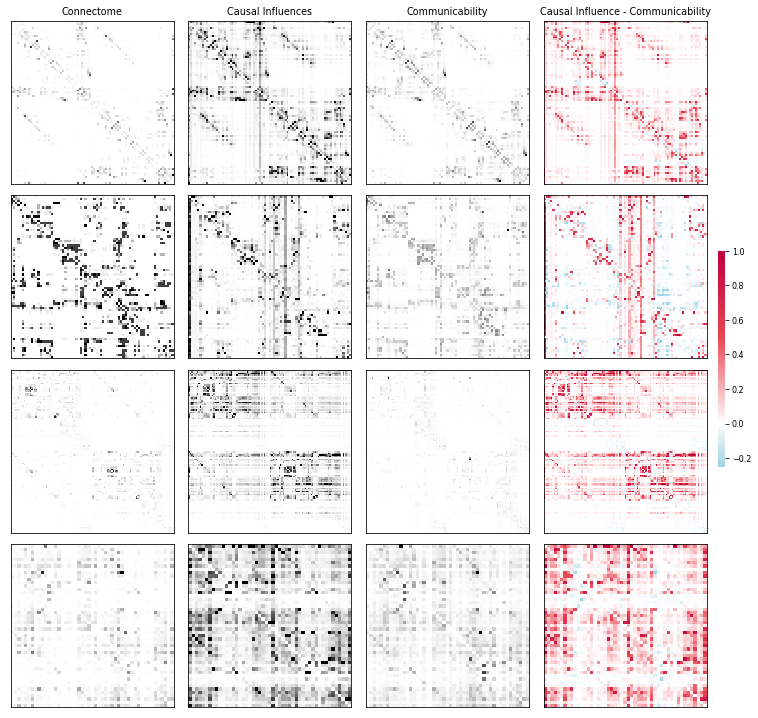

In [45]:
cols = ["Connectome", "Causal Influences",
        "Communicability", "Causal Influence - Communicability"]
rows = list(data.keys())

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:, 0], rows):
    ax.set_ylabel(row)

cbar_ax = fig.add_axes([1, .35, .01, .3])

for i, species in enumerate(data):
    sns.heatmap(data[species]['connectivity'], square=True,
                cmap='binary', cbar_kws={"shrink": .5},
                ax=axes[i, 0], linewidths=0., linecolor='k',
                xticklabels=False, yticklabels=False, cbar=False)
    sns.heatmap(data[species]['ci_mat_norm'], square=True,
                cmap='binary', cbar_kws={"shrink": .5}, ax=axes[i, 1], linewidths=0., linecolor='k', xticklabels=False, yticklabels=False, cbar=False)
    sns.heatmap(data[species]['communicability_norm'], square=True,
                cmap='binary', cbar_kws={"shrink": .5}, ax=axes[i, 2], linewidths=0., linecolor='k', xticklabels=False, yticklabels=False, cbar=False)
    sns.heatmap(data[species]['difference'], square=True, cmap=colormap, center=0, cbar_kws={
                "shrink": .5}, ax=axes[i, 3], linewidths=0., vmax=1, vmin=-0.25, linecolor='k', xticklabels=False, yticklabels=False, cbar_ax=cbar_ax)
for i in range(4):
    for j in range(4):
        axes[i, j].spines['right'].set_visible(True)
        axes[i, j].spines['top'].set_visible(True)
        axes[i, j].spines['bottom'].set_visible(True)
        axes[i, j].spines['left'].set_visible(True)

fig.tight_layout(pad=1)
plt.show()
#fig.legend(bbox_to_anchor=(0.97, 0.5),frameon=False,handletextpad=0.01)

#plt.savefig(f"CO vs CI.pdf",dpi=600,bbox_inches='tight')


In [49]:
for species in data:
    A = data[species]['connectivity']
    sparsity = 1.0 - (np.count_nonzero(A) / float(A.size))
    spectral_radius = np.max(np.abs(np.linalg.eig(A)[0]))

    print(species)
    print(f"Spectral Radius: {spectral_radius}")
    print(f"Sparsity: {sparsity}")
    print(f"Number of neurons: {data[species]['n_neurons']}")
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n")

human
Spectral Radius: 2.327416287906741
Sparsity: 0.6902308027289883
Number of neurons: 83
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

rat
Spectral Radius: 8.810772267334308
Sparsity: 0.6391443047476074
Number of neurons: 73
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

mouse
Spectral Radius: 2.61195518766864
Sparsity: 0.47847576530612246
Number of neurons: 112
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

drosophila
Spectral Radius: 2.4114964206159692
Sparsity: 0.18783840066638902
Number of neurons: 49
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

